# Intraday Stock Mean Reversion Trading Backtest in Python With Short Selling

http://www.pythonforfinance.net/2017/02/21/intraday-stock-mean-reversion-trading-backtest-in-python-with-short-selling/#more-15746

In [1]:
from utils.calvin_styles import *
import pandas as pd
import numpy as np
from pandas_datareader import data
import requests
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
#read the stock tickers and names into a DataFrame
stocks = pd.read_csv('data/NYSE.txt',delimiter="\t")
stocks.head()

,Symbol,Description
0,A,Agilent Technologies
1,AA,Alcoa Corporation
2,AAC,Aac Holdings Inc
3,AAN,Aaron's Inc
4,AAP,Advance Auto Parts Inc


In [3]:
stocks_list = []
 
#iterate through stock list and append tickers into our empty list
for symbol in stocks['Symbol']:
    stocks_list.append(symbol)
len(stocks_list)

3159

In [8]:
#create empty list to hold our return series DataFrame for each stock
frames = []
for stock in stocks_list[:10]:
 
    try:
        #download stock data and place in DataFrame
        df = data.DataReader(stock, 'yahoo',start='1/1/2000')
 
        #create column to hold our 90 day rolling standard deviation
        df['Stdev'] = df['Close'].rolling(window=90).std()
 
        #create a column to hold our 20 day moving average
        df['Moving Average'] = df['Close'].rolling(window=20).mean()
 
        #create a column which holds a TRUE value if the gap down from previous day's low to next 
        #day's open is larger than the 90 day rolling standard deviation
        df['Buy1'] = (df['Open'] - df['Low'].shift(1)) #&lt; -df['Stdev'] #create a column which holds a TRUE value if the opening price of the stock is above the 20 day moving average df['Buy2'] = df['Open'] &gt; df['Moving Average']
 
        #create a column that holds a TRUE value if both buy criteria are also TRUE
        df['BUY'] = df['Buy1'] #&amp; df['Buy2']
 
        #create a column which holds a TRUE value if the gap up from previous day's high to next 
        #day's open is larger than the 90 day rolling standard deviation
        df['Sell1'] = (df['Open'] - df['High'].shift(1)) #&gt; df['Stdev'] 
 
        #create a column which holds a TRUE value if the opening price of the stock is below the 20 day moving average 
        df['Sell2'] = df['Open'] #&lt; df['Moving Average']
 
        #create a column that holds a TRUE value if both sell criteria are also TRUE
        df['SELL'] = df['Sell1'] #&amp; df['Sell2']
 
        #calculate daily % return series for stock
        df['Pct Change'] = (df['Close'] - df['Open']) / df['Open']
 
        #create a strategy return series by using the daily stock returns mutliplied by 1 if we are long and -1 if we are short
        df['Rets'] = np.where(df['BUY'],df['Pct Change'], 0)
        df['Rets'] = np.where(df['SELL'],-df['Pct Change'], df['Rets'])
 
        #append the strategy return series to our list
        frames.append(df['Rets'])
    except:
        pass

In [9]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,Stdev,Moving Average,Buy1,BUY,Sell1,Sell2,SELL,Pct Change,Rets
Date,,,,,,,,,,,,,,,
2013-01-02,34.919998,35.400002,34.099998,35.119999,13767900,30.190541,NaN,NaN,NaN,NaN,NaN,34.919998,NaN,0.005727,-0.005727
2013-01-03,35.000000,35.000000,34.160000,34.830002,16739300,29.941248,NaN,NaN,0.900002,0.900002,-0.400002,35.000000,-0.400002,-0.004857,0.004857
2013-01-04,34.619999,34.889999,34.250000,34.389999,21372100,29.563005,NaN,NaN,0.459999,0.459999,-0.380001,34.619999,-0.380001,-0.006644,0.006644
2013-01-07,34.150002,35.450001,34.150002,34.459999,17897100,29.623179,NaN,NaN,-0.099998,-0.099998,-0.739997,34.150002,-0.739997,0.009078,-0.009078
2013-01-08,34.290001,34.639999,33.360001,33.709999,17863300,28.978450,NaN,NaN,0.139999,0.139999,-1.160000,34.290001,-1.160000,-0.016915,0.016915


In [10]:
frames

[Date
 2000-01-03    0.085714
 2000-01-04    0.023853
 2000-01-05    0.058491
 2000-01-06    0.026369
 2000-01-07   -0.100529
 2000-01-10    0.000906
 2000-01-11    0.013599
 2000-01-12    0.020221
 2000-01-13    0.010969
 2000-01-14   -0.020522
 2000-01-18   -0.041894
 2000-01-19    0.027778
 2000-01-20    0.037103
 2000-01-21    0.005425
 2000-01-24   -0.000000
 2000-01-25    0.015455
 2000-01-26   -0.005520
 2000-01-27    0.020572
 2000-01-28    0.020683
 2000-01-31    0.020352
 2000-02-01   -0.071698
 2000-02-02   -0.064348
 2000-02-03   -0.034081
 2000-02-04   -0.019293
 2000-02-07   -0.023331
 2000-02-08    0.021672
 2000-02-09    0.024155
 2000-02-10    0.004058
 2000-02-11    0.014706
 2000-02-14   -0.015781
                 ...   
 2017-01-27   -0.006830
 2017-01-30    0.016708
 2017-01-31   -0.019359
 2017-02-01   -0.006744
 2017-02-02   -0.000409
 2017-02-03   -0.005908
 2017-02-06   -0.002850
 2017-02-07   -0.004452
 2017-02-08   -0.011343
 2017-02-09   -0.010815
 2017-02-1

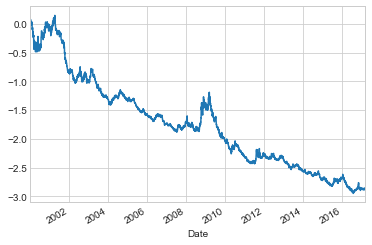

In [12]:
#concatenate the individual DataFrames held in our list- and do it along the column axis
masterFrame = pd.concat(frames,axis=1)
 
#create a column to hold the sum of all the individual daily strategy returns
masterFrame['Total'] = masterFrame.sum(axis=1)
 
#fill 'NaNs' with zeros to allow our "count" function below to work properly
masterFrame.fillna(0,inplace=True)

# create a column that hold the count of the number of stocks that were traded each day
# we minus one from it so that we dont count the "Total" column we added as a trade.
masterFrame['Count'] = (masterFrame != 0).sum(axis=1) - 1
 
#create a column that divides the "total" strategy return each day by the number of stocks traded that day to get equally weighted return.
masterFrame['Return'] = masterFrame['Total'] / masterFrame['Count']
 
#plot the strategy returns
masterFrame['Return'].dropna().cumsum().plot()